<!--BOOK_INFORMATION-->
<!--<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">-->

*[Notas de aula da disciplina de 
Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica)
do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/notebooks/01.03-Graficos_de_funcoes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a><br>

[<- Reconhecimento de Jupyter](01.02-Reconhecimento_de_Jupyter.ipynb) | [Índice](Indice.ipynb) | [Referências](99.00-Referencias.ipynb) | [Arquivos, dados e mais gráficos ->](01.04-Arquivos_dados_e_mais_graficos.ipynb)

---


# Gráficos de funções

## Gráfico de funções de uma variável

Vamos começar desenhando o gráfico de uma função simples. Digamos, $f(x) = x^2$.

Para a parte gráfica, usaremos o módulo `matplotlib.pyplot`. Para o tratamento numérico de funções matemáticas, usaremos o `numpy`.

Para exibir os gráficos no próprio navegador, logo abaixo do bloco de código, podemos usar o comando mágico `%matplotlib inline`, ou deixar em branco caso esse seja o padrão. Caso estejamos usando o `jupyter lab` ou o `jupyter notebook` e queiramos exibir os gráficos em uma janela externa para uma melhor manipulação ou visualização, podemos usar, por exemplo, `%matplotlib qt5` ou outro *backend* gráfico. Isso deve ser feito na primeira linha do bloco e antes da primeira importação do `matplotlib`. 

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

Agora definimos a função $f(x) = x^2$:

In [2]:
def f(x):
    return x**2

Faremos o gráfico no intervalo $[-2,2]$. 

Numericamente, traçaremos o gráfico a partir de 40 pontos distribuídos nesse intervalo. Definimos, para isso, uma malha uniforme, no eixo $x$, com espaçamento $0.1$ entre cada ponto da malha, ou seja $x=-2.0, -1.9, -1.8, \ldots, 1.9, 2.0$. 

A malha é criada através do `numpy`. Como ela vai ser uniforme, utilizamos a função `linspace()`, que recebe três argumentos: os extremos esquerdo e direito da malha e o número de pontos da malha.

Em seguida encontramos os valores da função $y=f(x)$ correspondentes a cada ponto dessa malha. Isso é feito simplesmente aplicando a função ao *ndarray* criado pelo numpy. Tanto `x` como `y`, agora, são *ndarrays* do numpy.

In [3]:
import numpy as np
x = np.linspace(-2,2,40)
y = f(x)
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Agora vem o trabalho de visualizar o gráfico usando o módulo `matplotlib.pyplot` importado acima:

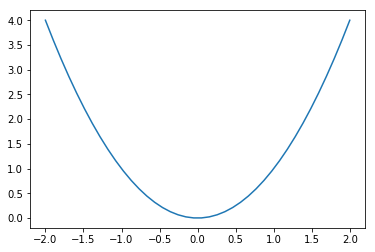

In [8]:
# Inicializa a figura
plt.figure()

# Desenha o gráfico na figura
plt.plot(x,y)

# Exibe a figura
plt.show()

Perfeito!

Se quisermos visualizar o gráfico em uma janela externa, isso é possível no `jupyter lab` e no `jupyter notebook`. Para tanto, devemos usar outro `backend`.

É possível alterar a forma de exibição entre `inline` e uma outro *backend* a qualquer momento, mas o resultado pode ser inesperado. E não é possível, no meio da execução do *kernel*, alterar entre dois tipos de *backend* diferentes do `inline`. Para isso, é necessário reiniciar o *kernel*. Fazemos isso com o comando mágico `%reset` e a opção `-f` para forçar a reinicialização, sem que se peça uma confirmação do usuário.

In [9]:
%reset -f

Por algum "bug" do matplotlib, é necessário, após a reinicialização, executar o comando mágico duas vezes. Para evitar erros caso estejamos no **Google Colab**, usamos `try/except`:

In [10]:
try:
    %matplotlib qt5
except:
    %matplotlib inline

In [11]:
try:
    %matplotlib qt5
except:
    %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

x = np.linspace(-2,2,40)
y = f(x)

plt.figure()

plt.plot(x,y)

plt.show()

Observe que na janela externa temos flexibilidade para aumentar a janela, ampliar a figura e gravá-la em diferentes formatos. 

Em seguida voltamos para a visualização no navegador, mas antes destruímos a janela externa recém-criada com a figura:

In [12]:
plt.close()

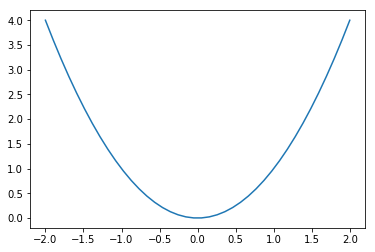

In [13]:
%matplotlib inline

# Desenha o gráfico na figura
plt.plot(x,y)

# Exibe a figura
plt.show()

Vamos tentar uma função com uma singularidade removível, pra brincar com o numpy: $f(x) = x\sin(1/x)$. Estude o código abaixo.

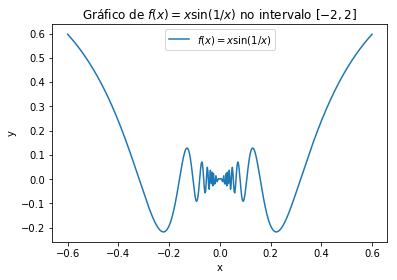

In [14]:
# Importa os módulos necessários (esquecendo que já foram importados acima, para tornar esta célula de código independente das outras)
import numpy as np
import matplotlib.pyplot as plt

# Define a função a ser visualizada
def f(x):
    x_null_ind = np.where(x == 0)[0]
    x_temp = 1.0*x
    x_temp[x_null_ind] = 1.0/np.pi
    return x_temp*np.sin(1.0/x_temp)


# Define a malha no eixo x em que os valores serão calculados
x = np.linspace(-0.6,0.6,500)

# Encontra os valores da função nos pontos da malha
y = f(x)

# Cria o objeto onde a figura será gerada
plt.figure()
#ax = fig.add_subplot(111)

# Traça o gráfico no objeto da figura
plt.plot(x,y, label='$f(x) = x \sin(1/x)$')

# Inclui legendas informativas
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de $f(x) = x\sin(1/x)$ no intervalo $[-2,2]$')
plt.legend(loc='best') # posição da legenda

# Exibe a figura na tela
plt.show()

Observe que usamos o mesmo nome $f$ para a função, para não acumular, na memória, objetos que não serão mais usados.

## Gráficos de funções tabeladas

Caso os dados estejam em uma lista, também é fácil visualizar o gráfico.

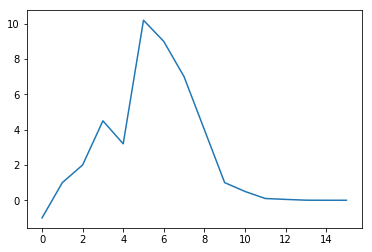

In [15]:
dados = [-1, 1, 2, 4.5, 3.2, 10.2, 9.0, 7.0, 4.0, 1.0, 0.5, 0.1, 0.05, 0.005, 0.0005, 0]

# Inicializa a figura
plt.figure()

# Traça o gráfico na figura
plt.plot(dados)

# Exibe a figura na tela
plt.show()

Podemos superpor mais de um gráfico

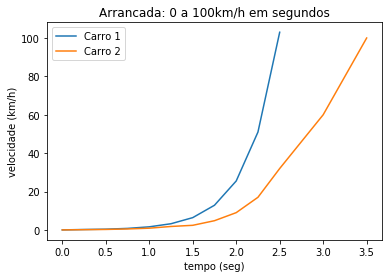

In [16]:
import matplotlib.pyplot as plt

# Define os dados
tempo1 = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5]
carro1 = [0, 0.22, 0.38, 0.79, 1.61, 3.22, 6.4, 12.85, 25.5, 51, 103]

tempo2 = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,3, 3.5]
carro2 = [0, 0.12, 0.25, 0.5, 0.9, 1.8, 2.4, 4.8, 9, 17, 32, 60, 100]

# Inicializa a figura
plt.figure()

# Traça o gráfico de cada carro na figura, adicionando uma legenda para cada um
plt.plot(tempo1, carro1, label='Carro 1')
plt.plot(tempo2, carro2, label='Carro 2')

# Define um local para exibir a legenda
plt.legend(loc='best')

# Define uma legenda para cada eixo
plt.xlabel('tempo (seg)')
plt.ylabel('velocidade (km/h)')

# Define o título para a figura
plt.title('Arrancada: 0 a 100km/h em segundos')

# Exibe a figura
plt.show()

Também podemos dividir a figura em vários blocos *("subplots")* e traçar diferentes gráficos em cada parte.

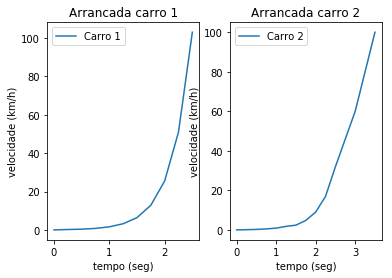

In [17]:
import matplotlib.pyplot as plt

# Define os dados
tempo1 = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5]
carro1 = [0, 0.22, 0.38, 0.79, 1.61, 3.22, 6.4, 12.85, 25.5, 51, 103]

tempo2 = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,3, 3.5]
carro2 = [0, 0.12, 0.25, 0.5, 0.9, 1.8, 2.4, 4.8, 9, 17, 32, 60, 100]

# Inicializa a figura
fig = plt.figure()

# Inicializa cada subplot, numa grade 1 x 2, a primeira na posição 1 e a segunda na 2
subplt1 = fig.add_subplot(121)
subplt2 = fig.add_subplot(122)

# Traça o gráfico de cada carro na figura, adicionando uma legenda para cada um
subplt1.plot(tempo1, carro1, label='Carro 1')
subplt2.plot(tempo2, carro2, label='Carro 2')
subplt1.legend(loc='best')
subplt2.legend(loc='best')

# Inclui informações para cada figura
subplt1.set(title='Arrancada carro 1', 
            xlabel='tempo (seg)', ylabel='velocidade (km/h)')
subplt2.set(title='Arrancada carro 2', 
            xlabel='tempo (seg)', ylabel='velocidade (km/h)')

# Exibe a figura
plt.show()

## Gráfico de funções de duas variáveis

Agora vamos trabalhar com uma função de duas variáveis, $f(x) = \sqrt(x^2+y^2)$.

O módulo `pyplot` do `matplotlib` traça apenas gráficos bidimensionais. Para gráficos tridimensionais, utilizamos o módulo `mpl_toolkits.mplot3d`.

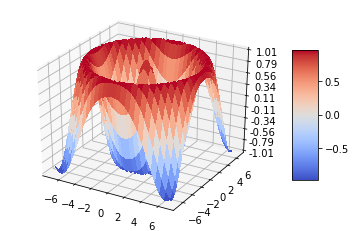

In [18]:
# Importa os módulos necessários (esquecendo que alguns já foram importados acima, para tornar esta célula de código independente das outras)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Define a função
def f(x,y):
    return np.cos(np.sqrt(x**2 + y**2))

# Gera os dados da função em uma malha na região a ser visualizada
x = np.arange(-7, 7, 0.25)
y = np.arange(-7, 7, 0.25)
x, y = np.meshgrid(x, y)
z = f(x,y)

# Define o elemento figura
fig = plt.figure(1)

# Define o elemento de gráfico como sendo uma projeção
ax = fig.gca(projection='3d')

# Traça a superfície
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customiza o eixo z.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Adiciona uma barra lateral com a referência entre cores e valores
fig.colorbar(surf, shrink=0.6, aspect=5)

# Exibe o gráfico
plt.show()


## Mais informações

Diversos tipos de gráficos podem ser feitos via [matplotlib](https://matplotlib.org), veja a galeria de exemplos [Sample plots in Matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html).

Para gráficos tridimensionais, veja o Tutorial [The mplot3d Toolkit](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

O [seaborn](https://seaborn.pydata.org/) também permite uma ampla gama de visualizações. Veja uma galeria de exemplos em [Example gallery](https://seaborn.pydata.org/examples/index.html).

Veja outros exemplos no [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) na página em [Charts in Colaboratory](https://colab.research.google.com/notebooks/charts.ipynb). 

No [Jupyter lab](http://jupyterlab.io) e no [Jupyter notebook](http://jupyter.org) é possível criar células e gráficos interativos através do [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/). Veja mais na página [Jupyter Widgets](http://jupyter.org/widgets). Infelizmente esse pacote não está disponível na platforma do [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb).

No [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), células interativas podem ser feitas inserindo [Form Fields](https://colab.research.google.com/notebooks/forms.ipynb).


## Exercícios

1. Faça o gráfico da função $y=x\sin(\pi x)$ no intervalo $[-8, 8]$.

1. Faça o gráfico da função $\displaystyle y=\sin\left(\frac{1}{x}\right)$ no intervalo $(0,2\pi]$.

1. Trace o gráfico da função $\displaystyle f(x) = \frac{e^{x}}{x}$, para $x\in \mathbb{R}$.

1. Faça o gráfico da função $z = \sin(x)*\cos(y)$ para $(x,y)$ em $[-4\pi,4\pi]^2$.

1. Trace os conjuntos de nível da função $z = \sin(x)*\cos(y)$, na região $(x,y) \in [-4\pi,4\pi]^2$.

1. Trace a helicóide parametrizada por $(x(t), y(t), z(t)) = (\sin 2\pi t, \cos 2\pi t, t)$, para $t\in [-4, 4]$.

<!--NAVIGATION-->

---
[<- Reconhecimento de Jupyter](01.02-Reconhecimento_de_Jupyter.ipynb) | [Índice](Indice.ipynb) | [Referências](99.00-Referencias.ipynb) | [Arquivos, dados e mais gráficos ->](01.04-Arquivos_dados_e_mais_graficos.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/notebooks/01.03-Graficos_de_funcoes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a><br>
